## Get going by asking the following questions and looking for the answers with some code and plots:

In [156]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
demographics = pd.read_csv('demographics.csv')
demographics

,Unnamed: 0,Country,badteeth,literacy_avg,water_avg,GDP_avg,sugar_avg,health_avg
0,0,Albania,3.02,98.712978,88.0,1011.752695,49.504318,24.751387
1,1,Algeria,2.30,59.752193,90.4,1625.140989,67.995227,50.424490
2,2,Angola,1.70,67.405416,38.4,318.739949,33.129091,12.275108
3,3,Antigua and Barbuda,0.70,98.950000,98.0,7874.822798,98.443182,259.996606
4,4,Argentina,3.40,95.744789,99.0,6638.252049,111.458182,322.041538
5,5,Armenia,2.40,99.076061,96.2,572.520726,42.995385,9.518863
6,6,Bangladesh,1.00,37.344009,95.0,280.214288,24.037273,24.814633
7,7,Belarus,2.70,98.737052,98.0,1196.023043,100.526923,64.079201
8,8,Belize,0.60,70.298423,88.8,1932.643033,123.600000,73.239017
9,9,Benin,0.80,26.128631,61.0,299.689409,8.469091,8.155448


## Can you count something interesting?

In [157]:
demographics['percent'] = demographics['health_avg'] / demographics['GDP_avg'] * 100
high_per = demographics[demographics['percent'] > 7]
high_per['Country'].count()

11

### From 2004 and before, 11 out of 106 countries spent more than 7% of their average GDP on healthcare



## Can you compare two related quantities?

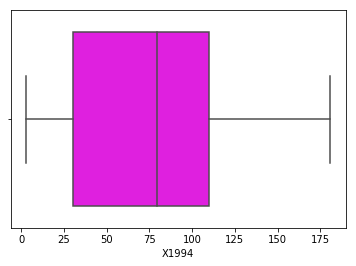

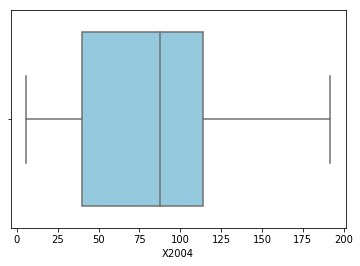

In [168]:
sugar = pd.read_csv('sugar_consumption.csv')
sugar.rename(columns = {'NA.':'Country'}, inplace = True)
sugar.dropna(how='all', subset = list(sugar.columns)[1:], inplace=True)
sugar_time = sugar.loc[:, ['Country', 'X1994', 'X2004']]
sugar_time.set_index('Country')
sugar_time['percent_change'] = (sugar_time['X2004'] / sugar_time['X1994'] * 100) - 100

sns.boxplot(x=sugar_time["X1994"], color="magenta")
plt.show()

sns.boxplot(x=sugar_time["X2004"], color="skyblue")
plt.show()


### The distribution of sugar consumption across the globe has stayed relatively similar, with consumption increasing overall slightly

## Can you find trends?

In [159]:
GDP = pd.read_csv('gdp.csv')
GDP.rename(index = str, columns={'Income.per.person..fixed.2000.US..':'Country'}, inplace=True)
GDP.dropna(how="all", subset = list(GDP.columns)[1:], inplace=True)
GDP_time = GDP.loc[:, ['Country', 'X1994', 'X2004']]
GDP_time['percent_change'] = (GDP_time['X2004'] / GDP_time['X1994'] * 100) - 100
GDP_time.dropna(inplace = True)
GDP_time.describe()

,X1994,X2004,percent_change
count,183.000000,183.000000,183.000000
mean,6437.097612,8161.158184,34.798105
std,10472.574589,13105.586325,80.436946
min,58.459932,88.243053,-28.661305
25%,485.771265,599.853707,12.495180
50%,1676.305198,2159.529606,23.396576
75%,7659.506226,9363.679014,40.427192
max,69311.894852,80255.753889,991.033315


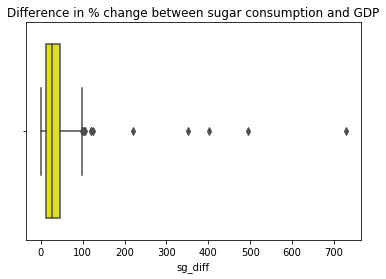

,X1994_x,X2004_x,sugar_change,X1994_y,X2004_y,GDP_change,sg_diff
count,150.000000,151.000000,150.000000,151.000000,151.000000,151.000000,150.000000
mean,75.854667,81.412252,31.363424,5391.630157,6701.451181,29.618130,45.738801
std,45.430497,44.802196,100.472492,8611.541291,10704.281463,40.273159,83.965294
min,2.740000,5.480000,-55.555556,58.459932,88.243053,-28.661305,0.527297
25%,30.140000,39.730000,-6.158550,416.929823,531.227093,12.107491,11.941531
50%,79.450000,87.670000,6.858084,1377.683470,1766.301257,21.727053,26.398665
75%,109.590000,112.330000,33.333333,4970.588526,6113.148880,40.427192,46.596945
max,180.820000,191.780000,800.000000,43153.553109,61227.967473,355.385019,727.906560


In [176]:
both = sugar_time.merge(GDP_time, on= 'Country')
both.rename(columns = {'percent_change_x':'sugar_change'}, inplace = True)
both.rename(columns = {'percent_change_y':'GDP_change'}, inplace = True)
both['sg_diff'] = abs(both['sugar_change'] - both['GDP_change'])
sns.boxplot(x=both["sg_diff"], color="yellow").set_title("Difference in % change between sugar consumption and GDP")
plt.show()

display(both.describe())

### The overall growth worldwide of sugar consumption and GDP are very similar except for a few outliers where GDP skrocketed while sugar consumption did not.

## Can you make a scatter plot?

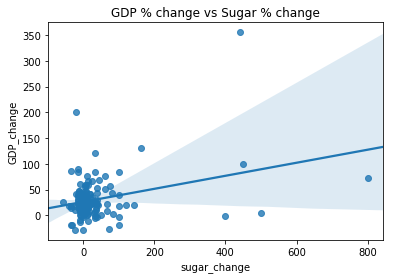

In [214]:
sns.regplot(x='sugar_change', y='GDP_change', data=both)
plt.title('GDP % change vs Sugar % change')
plt.show()


## Can you make a bar plot?

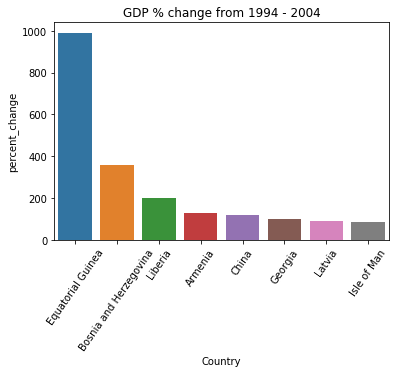

In [178]:
g = GDP_time.sort_values('percent_change', ascending = False).head(8)

sns.barplot(x="Country", y="percent_change", data=g)
plt.xticks(rotation = 55)
plt.title("GDP % change from 1994 - 2004")
plt.show()


### Equatorial Guinea had a 991% increase from 1994 to 2004, let's look into that

## Can you make a time-series plot?

/Users/silasneptune/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


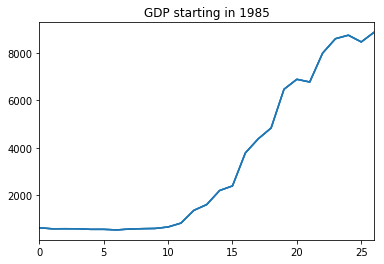

In [210]:
egr = pd.read_csv('gdp.csv', index_col = 0)
egr = egr.T
eg = egr['Equatorial Guinea']
eg.dropna(inplace = True)

sns.tsplot(data=eg)
plt.title('GDP starting in 1985')
plt.show()

### Starting in 1985, Equitorial Guinea's GDP has been on the rise. While the 1000% increase looked like it could have been a mistake, the data seems to support it being accurate.

## Takeaways:

### Sugar consumption and GDP both increased globally with a correlation of 0.763991 and with similar distributions. After 1995, some countries shot up in GDP and sugar consumption but this seems to be accurate data. I do not think you could very accurately predict one variable using the other, but given more demographics of each country hopefully this will be possible.